# <center>K-means Clustering</center>

## Modules

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Initialize the dataframe

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


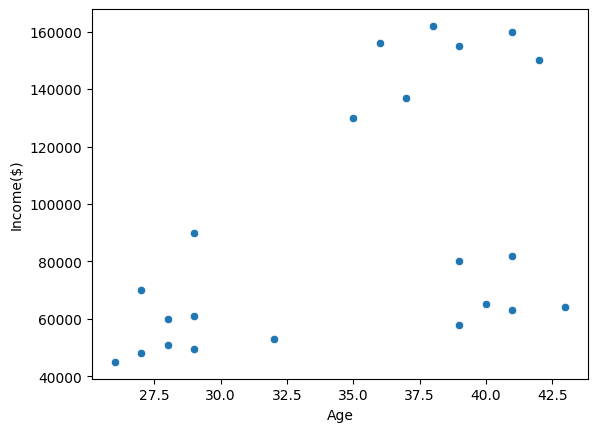

In [4]:
sns.scatterplot(data=df, x='Age', y='Income($)')
plt.show()

Obviously, we need to group the data into 3 clusters.

## Model Training

In [17]:
X = df.drop('Name', axis=1)
X.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [12]:
kmeans = KMeans(n_clusters=3, verbose=True)

kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': True}

In [19]:
y_pred = kmeans.fit_predict(X)
y_pred

Initialization complete
Iteration 0, inertia 3031251378.0.
Iteration 1, inertia 1606229737.6785715.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2047250849.0.
Iteration 1, inertia 1624128115.6285715.
Iteration 2, inertia 1577046058.8831167.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2242250777.0.
Iteration 1, inertia 1717216650.0612872.
Iteration 2, inertia 1624128115.6285715.
Iteration 3, inertia 1577046058.8831167.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2206251221.0.
Iteration 1, inertia 1880240437.4872136.
Iteration 2, inertia 1815543459.5991707.
Iteration 3, inertia 1776213605.3941324.
Iteration 4, inertia 1717216650.0612872.
Iteration 5, inertia 1624128115.6285715.
Iteration 6, inertia 1577046058.8831167.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1791251116.0.
Iteration 1, inertia 15770460

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [20]:
df['Cluster'] = y_pred

df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


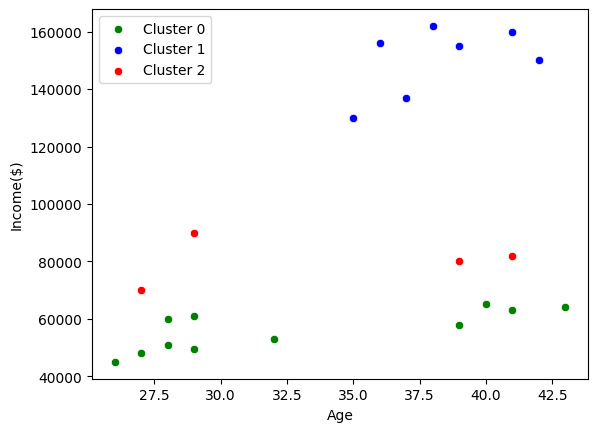

In [25]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

sns.scatterplot(data=df0, x='Age', y='Income($)', color='Green', label='Cluster 0')
sns.scatterplot(data=df1, x='Age', y='Income($)', color='Blue', label='Cluster 1')
sns.scatterplot(data=df2, x='Age', y='Income($)', color='Red', label='Cluster 2')

plt.legend()

plt.show()

The problem in clustering occured because, the y-axis has range from 40000 to 160000 but the x-axis has range from 27.5 to 42.5   
We need to scale the labels from 0 to 1.

#### Scaling the labels

In [36]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [37]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


#### Training the model again after scaling

In [46]:
X = df.drop(['Name', 'Cluster'], axis=1)

In [47]:
kmeans = KMeans(n_clusters=3)

y_pred = kmeans.fit_predict(X)
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [48]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


#### Centers of our 3 clusters

In [51]:
centriods = kmeans.cluster_centers_
centriods

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

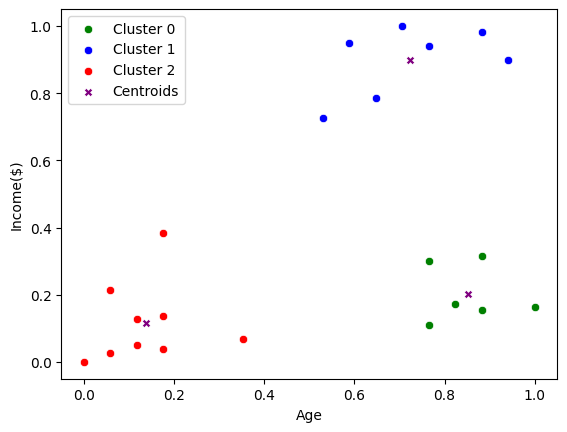

In [94]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

sns.scatterplot(data=df0, x='Age', y='Income($)', color='Green', label='Cluster 0')
sns.scatterplot(data=df1, x='Age', y='Income($)', color='Blue', label='Cluster 1')
sns.scatterplot(data=df2, x='Age', y='Income($)', color='Red', label='Cluster 2')

# plotting the centroids
sns.scatterplot(x=centriods[:, 0], y=centriods[:, 1], color='purple', marker='X', label='Centroids')

plt.legend()

plt.show()

## Using Algo-plot method

In [66]:
krange = range(1, 10)

# sum of squared error
SSE = []

for k in krange:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Age', 'Income($)']])
    
    # inertia_ gives SSE
    SSE.append(kmeans.inertia_)

In [67]:
SSE

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.22443334487241418,
 0.16858512236029757,
 0.1424758252254333,
 0.10383752586603559]

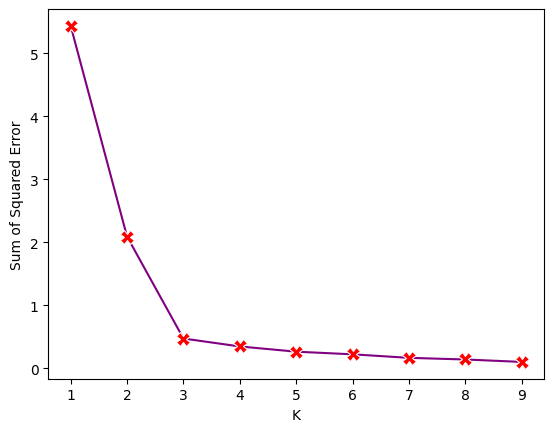

In [90]:
sns.lineplot(x=krange, y=SSE, color='purple', marker='X', markerfacecolor='red', markersize=10)

plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

plt.show()